# Using Data to Improve a Marketing Promotion for the LA Dodgers
### Xander Hieken
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

dodgers = pd.read_csv("dodgers.csv")

myColors = ['#0F7CC1', '#DE0506', '#FFB81C']
sns.set_palette(sns.color_palette(myColors))

### Checking the data format to make sure things imported as expected

In [2]:
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


***
## Boxplots for the full season

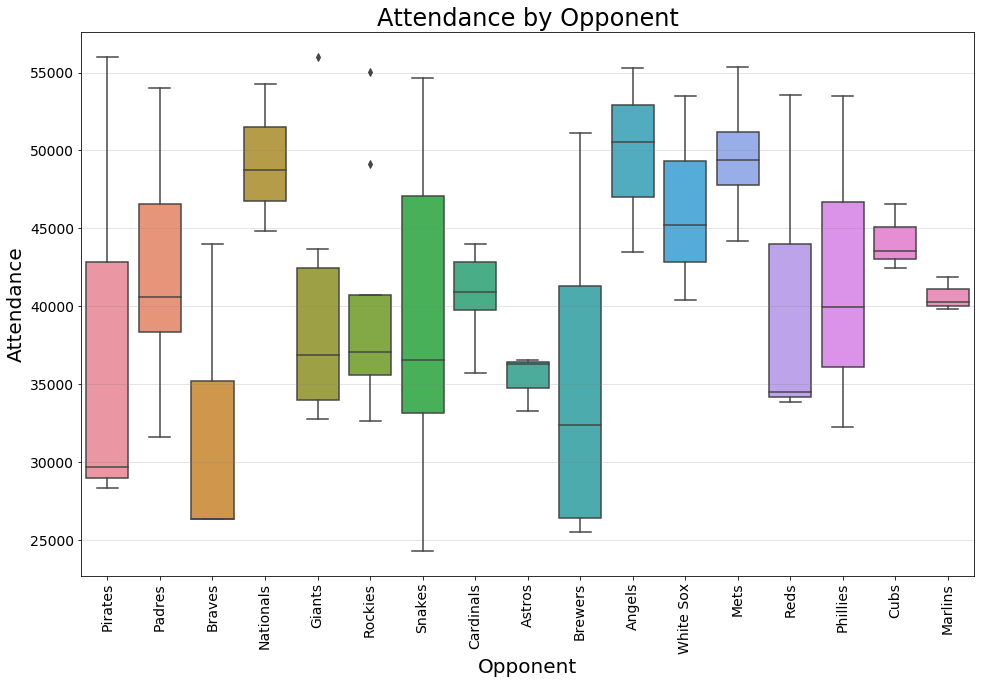

In [3]:
plt.figure(figsize=(16, 10))
plt.grid(axis = 'y', alpha = 0.4, linewidth = 0.5, color = 'grey')
bplot = sns.boxplot(x = "opponent", y = "attend", data = dodgers, width = 0.8)
bplot.axes.set_title("Attendance by Opponent", fontsize=24)
bplot.set_xlabel("Opponent", fontsize = 20)
bplot.set_ylabel("Attendance", fontsize = 20)
bplot.tick_params(labelsize=14)
plt.xticks(rotation=90);

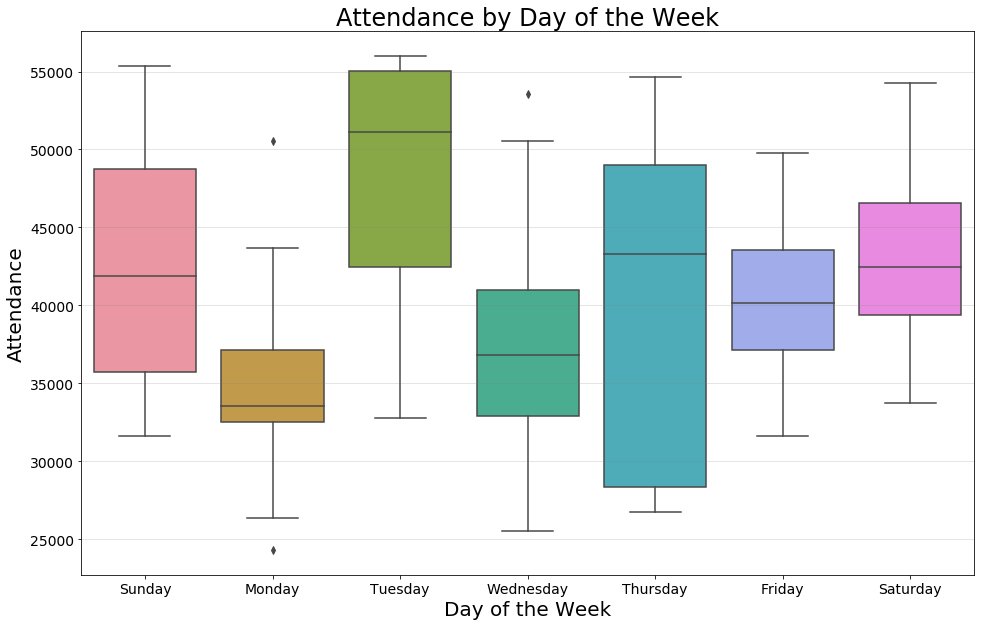

In [4]:
plt.figure(figsize=(16, 10))
plt.grid(axis = 'y', alpha = 0.4, linewidth = 0.5, color = 'grey')
bplot = sns.boxplot(x = "day_of_week", y = "attend", data = dodgers, width = 0.8,
                    order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
bplot.axes.set_title("Attendance by Day of the Week", fontsize=24)
bplot.set_xlabel("Day of the Week", fontsize = 20)
bplot.set_ylabel("Attendance", fontsize = 20)
bplot.tick_params(labelsize=14)

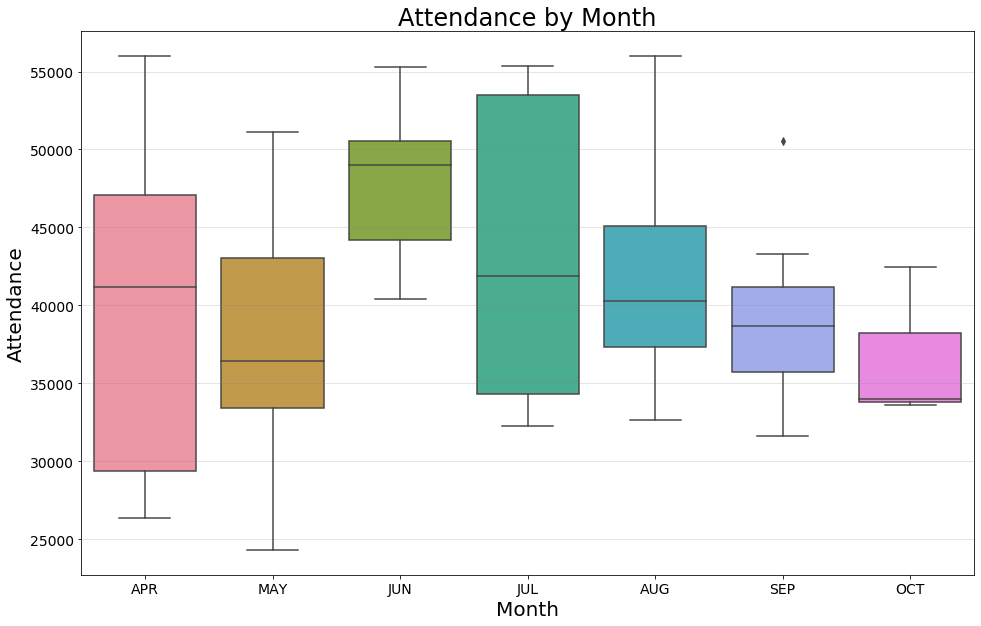

In [5]:
plt.figure(figsize=(16, 10))
plt.grid(axis = 'y', alpha = 0.4, linewidth = 0.5, color = 'grey')
bplot = sns.boxplot(x = "month", y = "attend", data = dodgers, width = 0.8,
                    order=["APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT"])
bplot.axes.set_title("Attendance by Month", fontsize=24)
bplot.set_xlabel("Month", fontsize = 20)
bplot.set_ylabel("Attendance", fontsize = 20)
bplot.tick_params(labelsize=14)

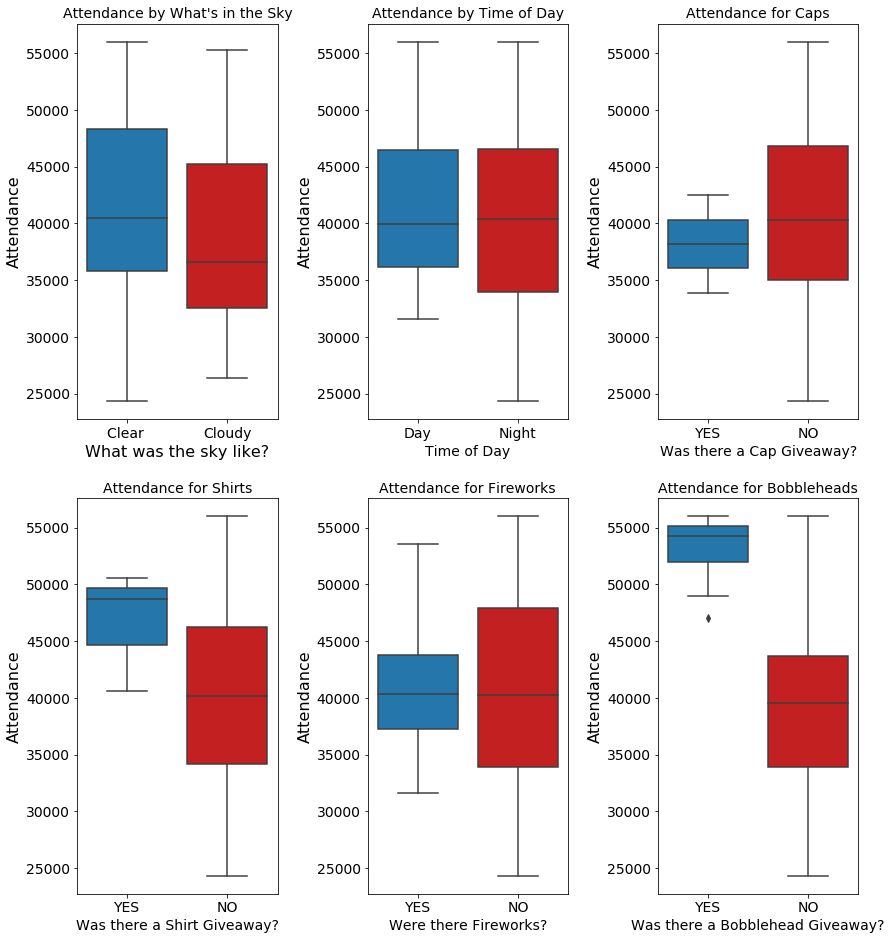

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(14, 16))

ax1 = sns.boxplot(x = "skies", y = "attend", data = dodgers, width = 0.8, ax=axes[0, 0])
ax1.axes.set_title("Attendance by What's in the Sky", fontsize=14)
ax1.set_xlabel("What was the sky like?", fontsize = 16)
ax1.set_ylabel("Attendance", fontsize = 16)
ax1.tick_params(labelsize=14)

ax2 = sns.boxplot(x = "day_night", y = "attend", data = dodgers, width = 0.8, ax=axes[0, 1])
ax2.axes.set_title("Attendance by Time of Day", fontsize=14)
ax2.set_xlabel("Time of Day", fontsize = 14)
ax2.set_ylabel("Attendance", fontsize = 16)
ax2.tick_params(labelsize=14)

ax3 = sns.boxplot(x = "cap", y = "attend", data = dodgers, width = 0.8, order = ['YES', 'NO'], ax=axes[0, 2])
ax3.axes.set_title("Attendance for Caps", fontsize=14)
ax3.set_xlabel("Was there a Cap Giveaway?", fontsize = 14)
ax3.set_ylabel("Attendance", fontsize = 16)
ax3.tick_params(labelsize=14)

ax4 = sns.boxplot(x = "shirt", y = "attend", data = dodgers, width = 0.8, order = ['YES', 'NO'], ax=axes[1, 0])
ax4.axes.set_title("Attendance for Shirts", fontsize=14)
ax4.set_xlabel("Was there a Shirt Giveaway?", fontsize = 14)
ax4.set_ylabel("Attendance", fontsize = 16)
ax4.tick_params(labelsize=14)

ax5 = sns.boxplot(x = "fireworks", y = "attend", data = dodgers, width = 0.8, order = ['YES', 'NO'], ax=axes[1, 1])
ax5.axes.set_title("Attendance for Fireworks", fontsize=14)
ax5.set_xlabel("Were there Fireworks?", fontsize = 14)
ax5.set_ylabel("Attendance", fontsize = 16)
ax5.tick_params(labelsize=14)

ax6 = sns.boxplot(x = "bobblehead", y = "attend", data = dodgers, width = 0.8, order = ['YES', 'NO'], ax=axes[1, 2])
ax6.axes.set_title("Attendance for Bobbleheads", fontsize=14)
ax6.set_xlabel("Was there a Bobblehead Giveaway?", fontsize = 14)
ax6.set_ylabel("Attendance", fontsize = 16)
ax6.tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.45)

***
## Scatterplots for the whole season

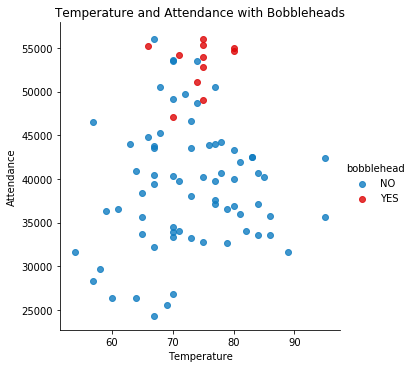

In [7]:
sns.lmplot('temp', 'attend', data=dodgers, fit_reg=False, hue="bobblehead")
plt.title('Temperature and Attendance with Bobbleheads')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

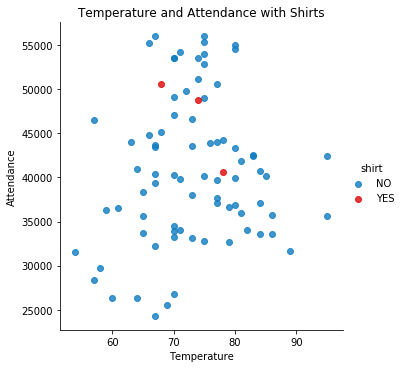

In [8]:
sns.lmplot('temp', 'attend', data=dodgers, fit_reg=False, hue="shirt")
plt.title('Temperature and Attendance with Shirts')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

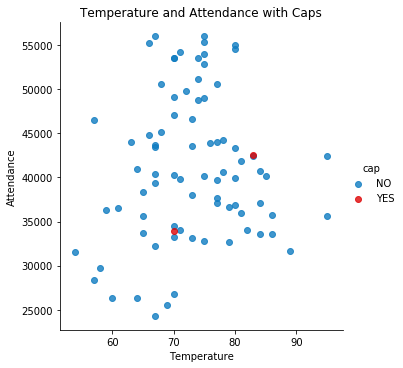

In [9]:
sns.lmplot('temp', 'attend', data=dodgers, fit_reg=False, hue="cap")
plt.title('Temperature and Attendance with Caps')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

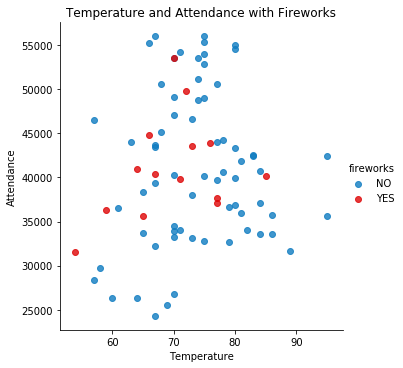

In [10]:
sns.lmplot('temp', 'attend', data=dodgers, fit_reg=False, hue="fireworks")
plt.title('Temperature and Attendance with Fireworks')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

***
## One-Hot Encoding and Generating a Correlation Matrix 

In [11]:
onehot = ['month', 'day', 'day_of_week', 'opponent', 'skies', 
          'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']
df = dodgers
for item in onehot:
    df = pd.concat([df ,pd.get_dummies(df[item], prefix=item)],axis=1)

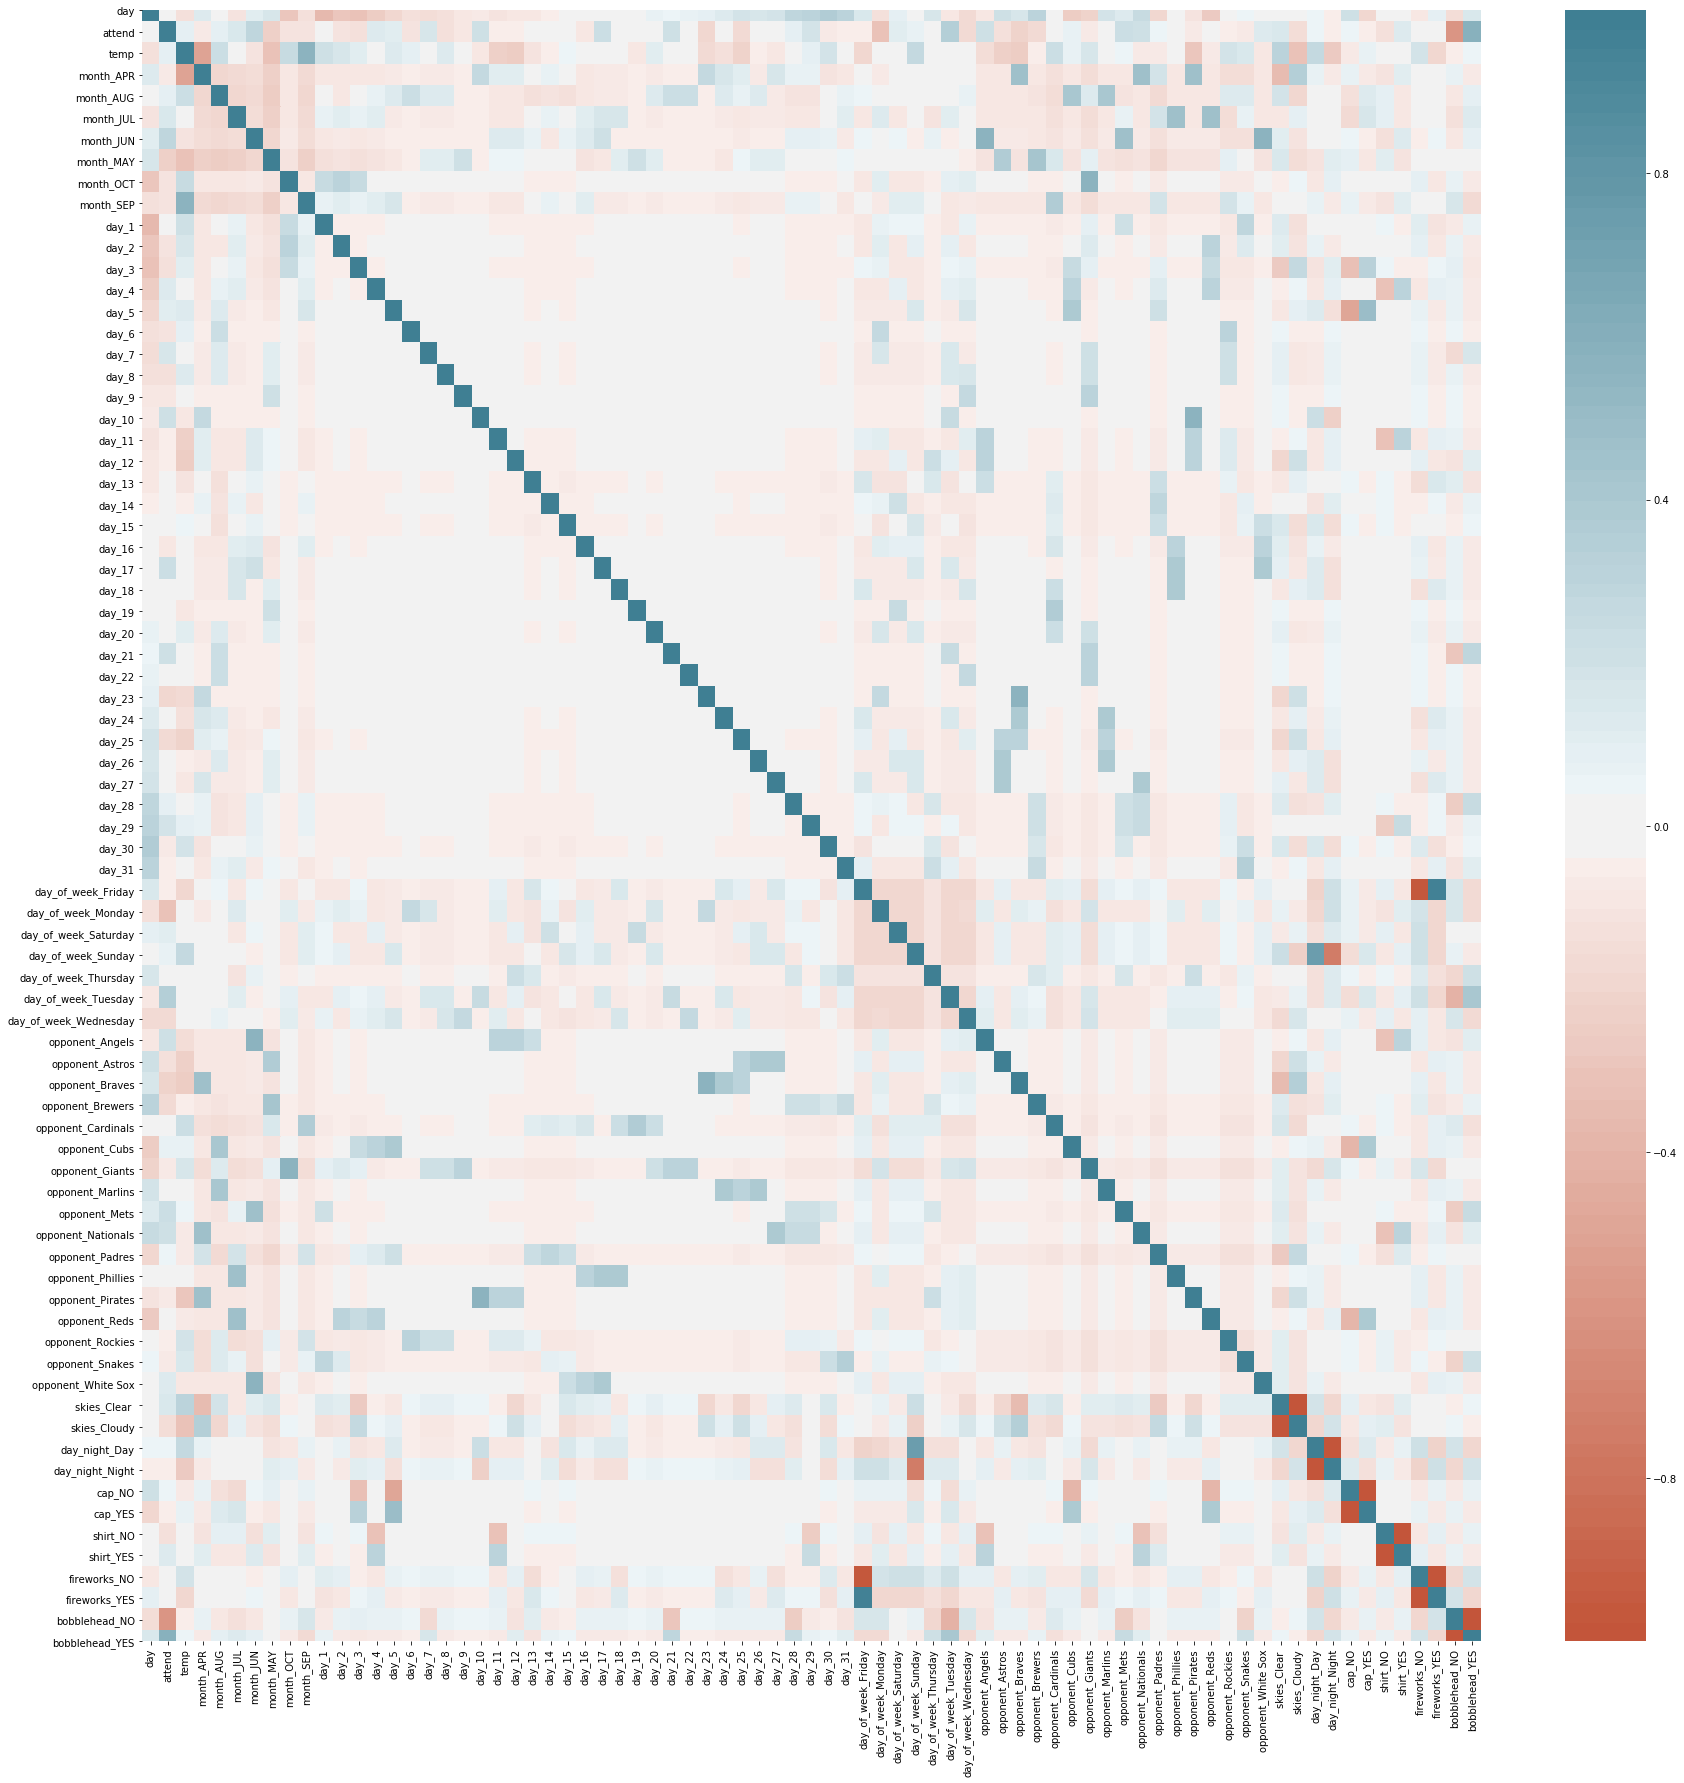

In [12]:
dfAll = df.drop(['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], axis=1)
corr = dfAll.corr()
plt.figure(figsize=(30, 30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

***
### Next, I want to see if breaking the data down into individual months will reveal additional useful information. 

In [13]:
dfAPR = dodgers.loc[dodgers['month'] == 'APR']
dfMAY = dodgers.loc[dodgers['month'] == 'MAY']
dfJUN = dodgers.loc[dodgers['month'] == 'JUN']
dfJUL = dodgers.loc[dodgers['month'] == 'JUL']
dfAUG = dodgers.loc[dodgers['month'] == 'AUG']
dfSEP = dodgers.loc[dodgers['month'] == 'SEP']
dfOCT = dodgers.loc[dodgers['month'] == 'OCT']


## Boxplots for each month

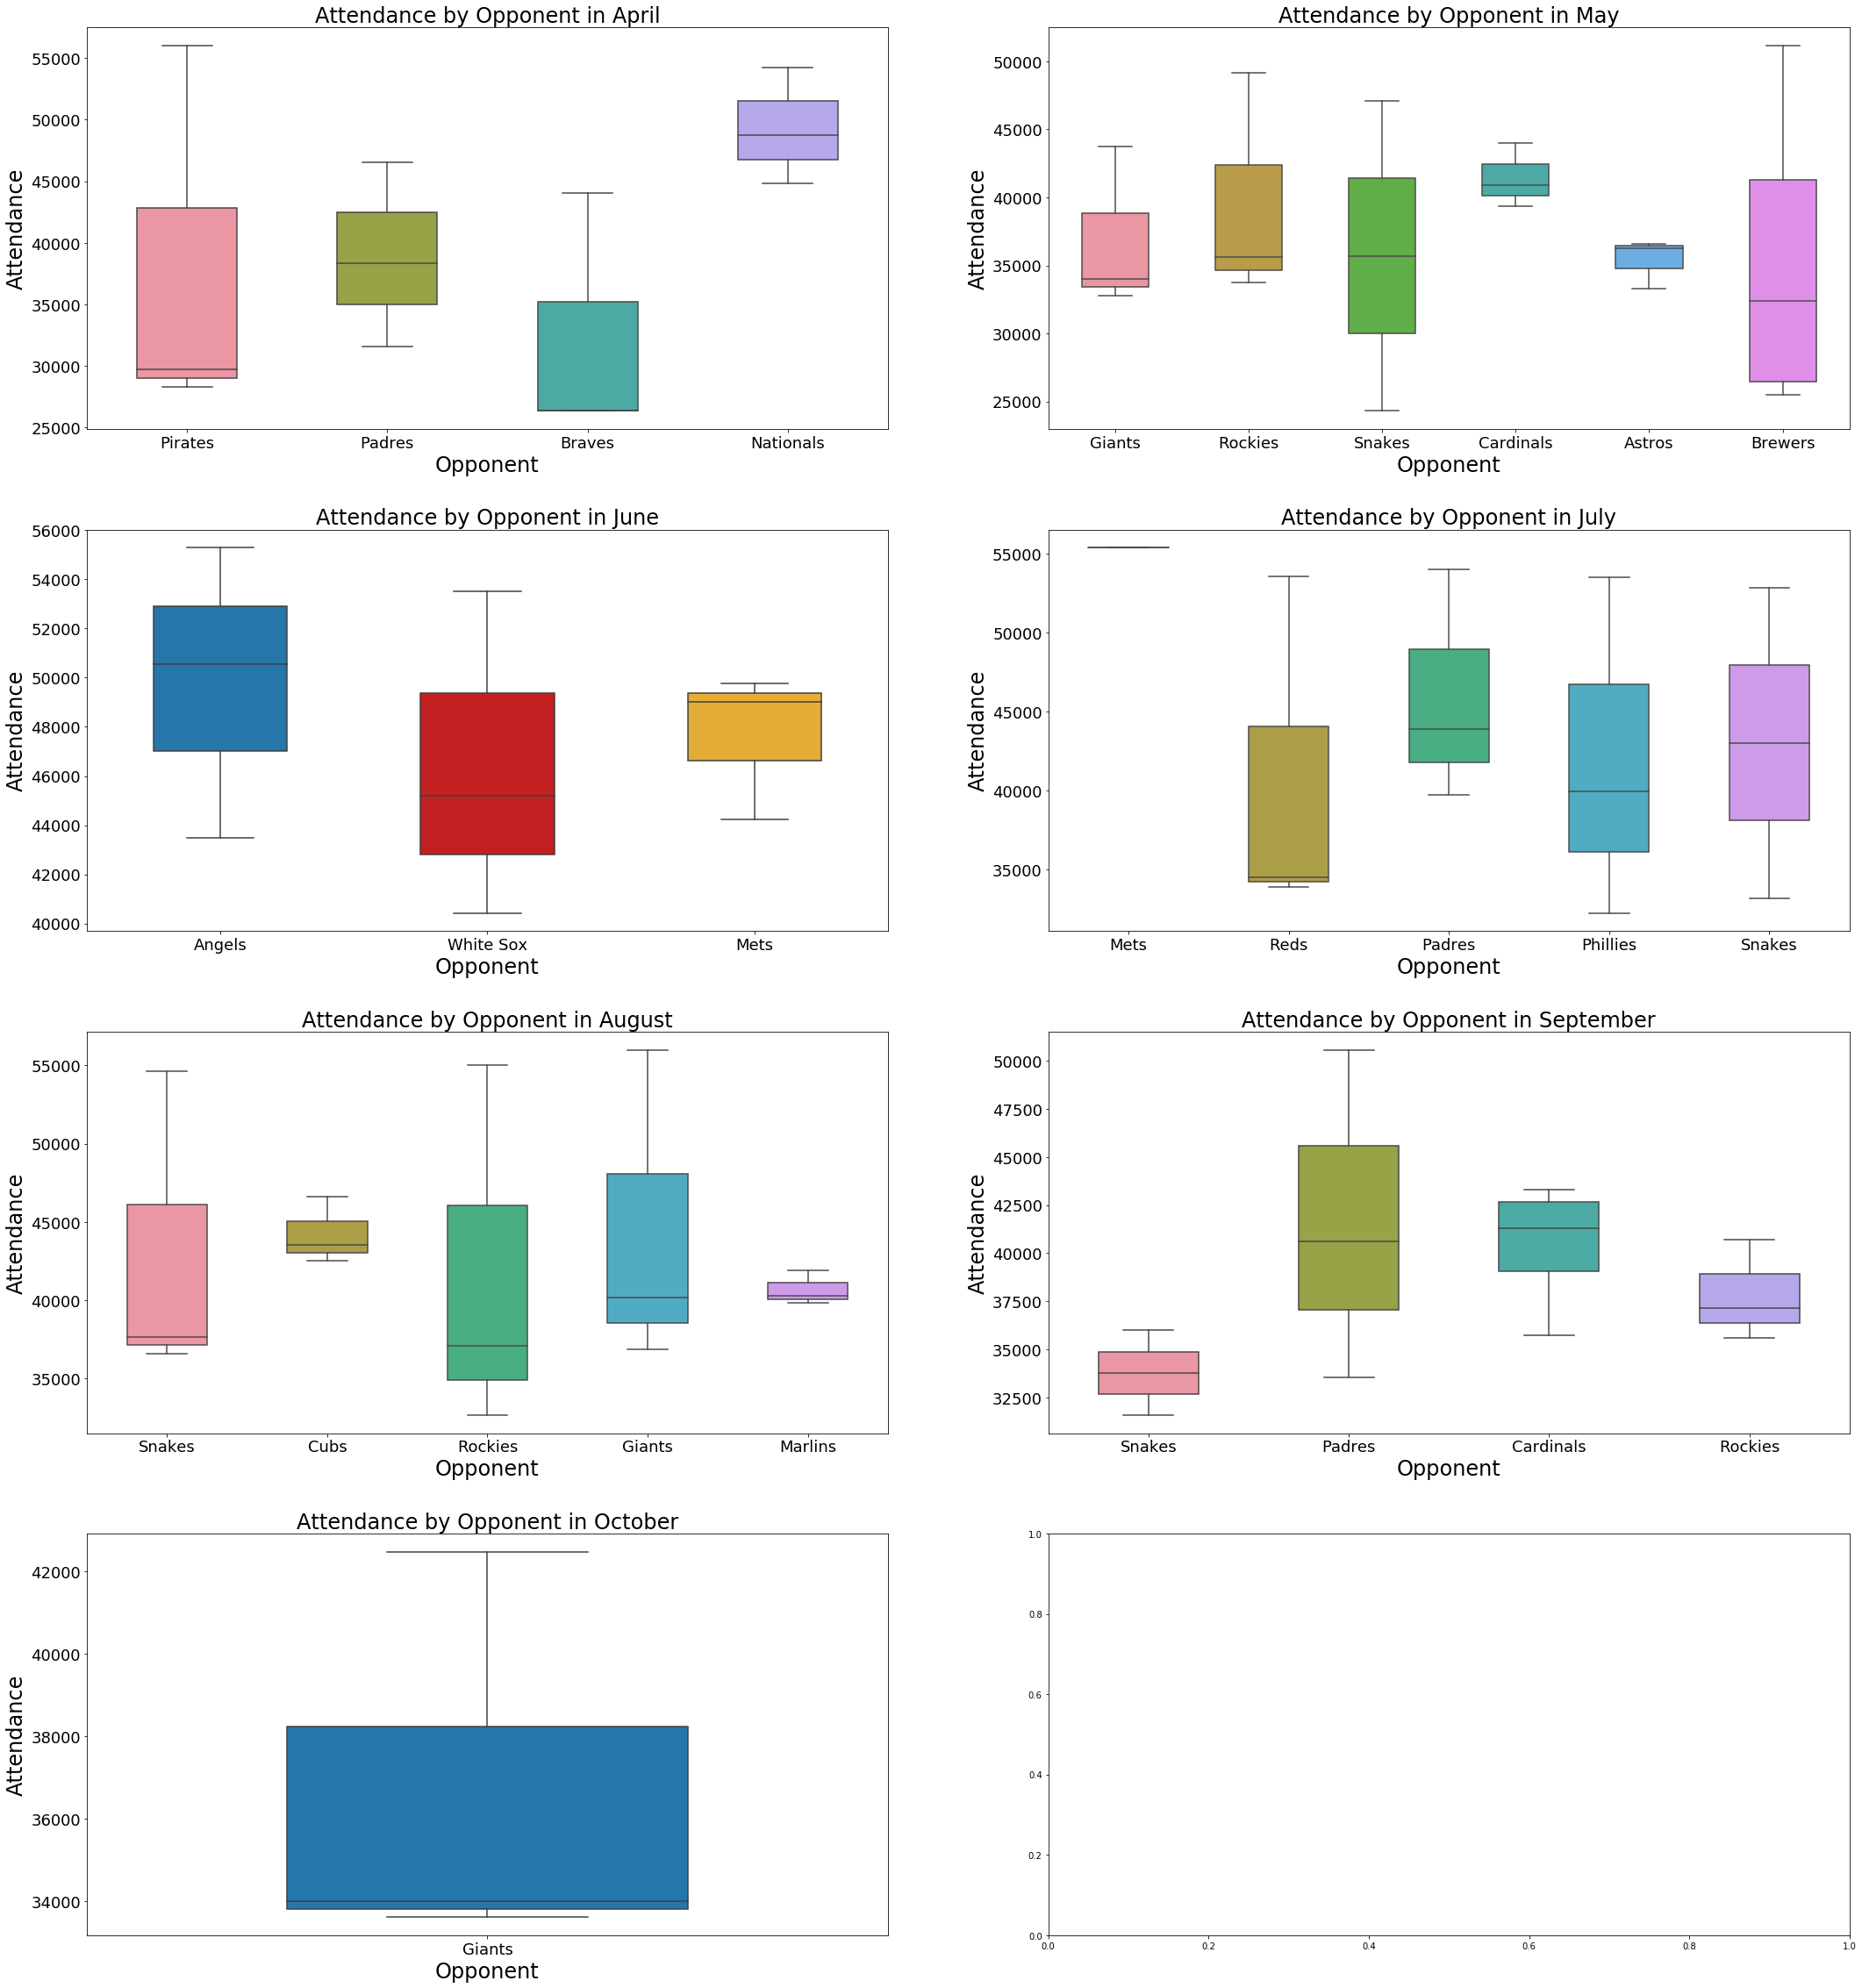

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(36, 40))

ax1 = sns.boxplot(x = "opponent", y = "attend", data = dfAPR, width = 0.5, ax=axes[0, 0])
ax1.axes.set_title("Attendance by Opponent in April", fontsize=24)
ax1.set_xlabel("Opponent", fontsize = 24)
ax1.set_ylabel("Attendance", fontsize = 24)
ax1.tick_params(labelsize=18)

ax2 = sns.boxplot(x = "opponent", y = "attend", data = dfMAY, width = 0.5, ax=axes[0, 1])
ax2.axes.set_title("Attendance by Opponent in May", fontsize=24)
ax2.set_xlabel("Opponent", fontsize = 24)
ax2.set_ylabel("Attendance", fontsize = 24)
ax2.tick_params(labelsize=18)

ax3 = sns.boxplot(x = "opponent", y = "attend", data = dfJUN, width = 0.5, ax=axes[1, 0])
ax3.axes.set_title("Attendance by Opponent in June", fontsize=24)
ax3.set_xlabel("Opponent", fontsize = 24)
ax3.set_ylabel("Attendance", fontsize = 24)
ax3.tick_params(labelsize=18)

ax4 = sns.boxplot(x = "opponent", y = "attend", data = dfJUL, width = 0.5, ax=axes[1, 1])
ax4.axes.set_title("Attendance by Opponent in July", fontsize=24)
ax4.set_xlabel("Opponent", fontsize = 24)
ax4.set_ylabel("Attendance", fontsize = 24)
ax4.tick_params(labelsize=18)

ax5 = sns.boxplot(x = "opponent", y = "attend", data = dfAUG, width = 0.5, ax=axes[2, 0])
ax5.axes.set_title("Attendance by Opponent in August", fontsize=24)
ax5.set_xlabel("Opponent", fontsize = 24)
ax5.set_ylabel("Attendance", fontsize = 24)
ax5.tick_params(labelsize=18)

ax6 = sns.boxplot(x = "opponent", y = "attend", data = dfSEP, width = 0.5, ax=axes[2, 1])
ax6.axes.set_title("Attendance by Opponent in September", fontsize=24)
ax6.set_xlabel("Opponent", fontsize = 24)
ax6.set_ylabel("Attendance", fontsize = 24)
ax6.tick_params(labelsize=18)

ax7 = sns.boxplot(x = "opponent", y = "attend", data = dfOCT, width = 0.5, ax=axes[3, 0])
ax7.axes.set_title("Attendance by Opponent in October", fontsize=24)
ax7.set_xlabel("Opponent", fontsize = 24)
ax7.set_ylabel("Attendance", fontsize = 24)
ax7.tick_params(labelsize=18)

plt.subplots_adjust(hspace=0.25)

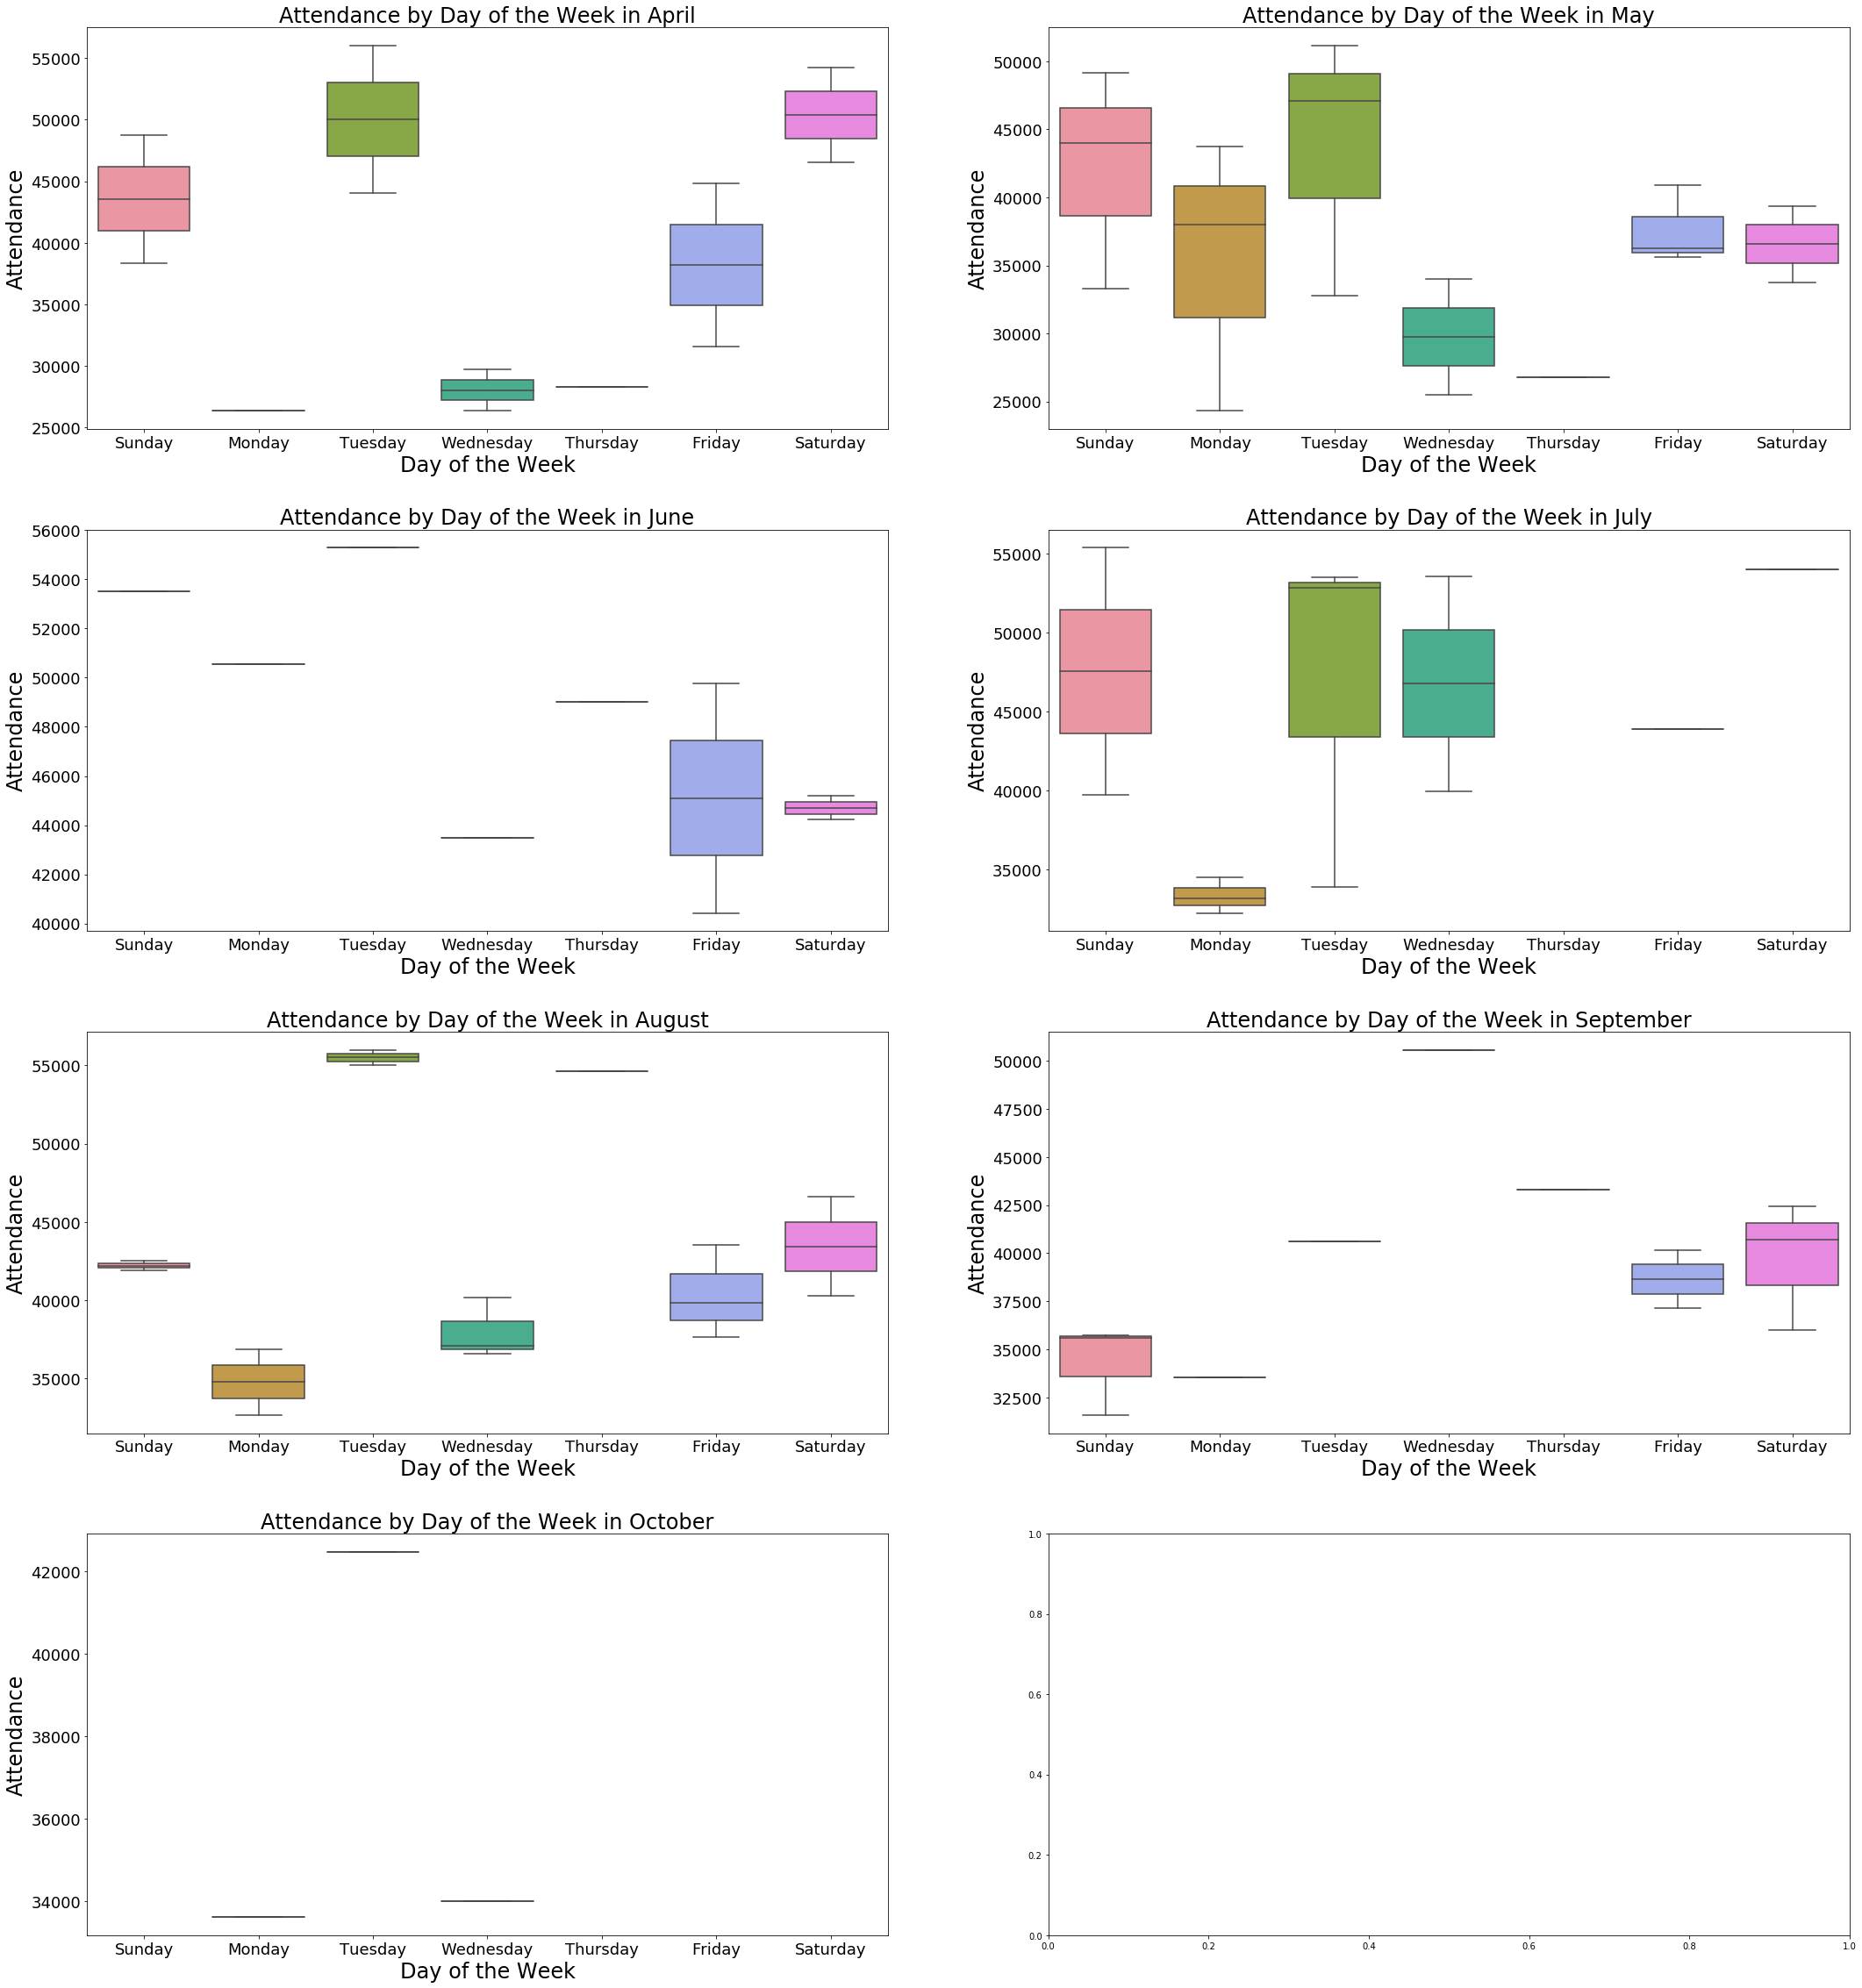

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(36, 40))

ax1 = sns.boxplot(x = "day_of_week", y = "attend", data = dfAPR, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[0, 0])
ax1.axes.set_title("Attendance by Day of the Week in April", fontsize=24)
ax1.set_xlabel("Day of the Week", fontsize = 24)
ax1.set_ylabel("Attendance", fontsize = 24)
ax1.tick_params(labelsize=18)

ax2 = sns.boxplot(x = "day_of_week", y = "attend", data = dfMAY, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[0, 1])
ax2.axes.set_title("Attendance by Day of the Week in May", fontsize=24)
ax2.set_xlabel("Day of the Week", fontsize = 24)
ax2.set_ylabel("Attendance", fontsize = 24)
ax2.tick_params(labelsize=18)

ax3 = sns.boxplot(x = "day_of_week", y = "attend", data = dfJUN, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[1, 0])
ax3.axes.set_title("Attendance by Day of the Week in June", fontsize=24)
ax3.set_xlabel("Day of the Week", fontsize = 24)
ax3.set_ylabel("Attendance", fontsize = 24)
ax3.tick_params(labelsize=18)

ax4 = sns.boxplot(x = "day_of_week", y = "attend", data = dfJUL, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[1, 1])
ax4.axes.set_title("Attendance by Day of the Week in July", fontsize=24)
ax4.set_xlabel("Day of the Week", fontsize = 24)
ax4.set_ylabel("Attendance", fontsize = 24)
ax4.tick_params(labelsize=18)

ax5 = sns.boxplot(x = "day_of_week", y = "attend", data = dfAUG, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[2, 0])
ax5.axes.set_title("Attendance by Day of the Week in August", fontsize=24)
ax5.set_xlabel("Day of the Week", fontsize = 24)
ax5.set_ylabel("Attendance", fontsize = 24)
ax5.tick_params(labelsize=18)

ax6 = sns.boxplot(x = "day_of_week", y = "attend", data = dfSEP, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[2, 1])
ax6.axes.set_title("Attendance by Day of the Week in September", fontsize=24)
ax6.set_xlabel("Day of the Week", fontsize = 24)
ax6.set_ylabel("Attendance", fontsize = 24)
ax6.tick_params(labelsize=18)

ax7 = sns.boxplot(x = "day_of_week", y = "attend", data = dfOCT, width = 0.8,
      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[3, 0])
ax7.axes.set_title("Attendance by Day of the Week in October", fontsize=24)
ax7.set_xlabel("Day of the Week", fontsize = 24)
ax7.set_ylabel("Attendance", fontsize = 24)
ax7.tick_params(labelsize=18)

plt.subplots_adjust(hspace=0.25)

***
## Scatterplots for each month

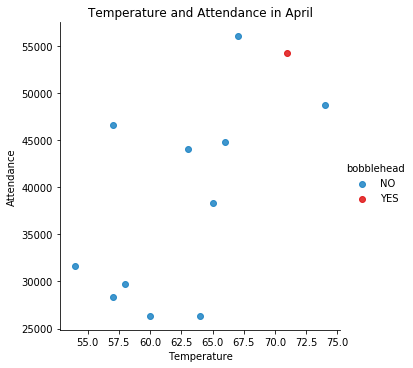

In [16]:
sns.lmplot('temp', 'attend', data=dfAPR, fit_reg=False, hue="bobblehead", hue_order = ['NO', 'YES'])
plt.title('Temperature and Attendance in April')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

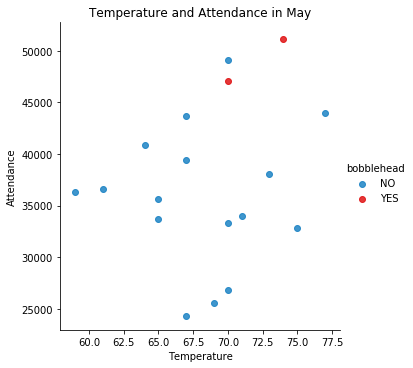

In [17]:
sns.lmplot('temp', 'attend', data=dfMAY, fit_reg=False, hue="bobblehead", hue_order = ['NO', 'YES'])
plt.title('Temperature and Attendance in May')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

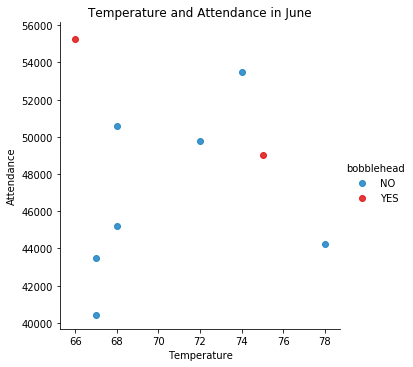

In [18]:
sns.lmplot('temp', 'attend', data=dfJUN, fit_reg=False, hue="bobblehead", hue_order = ['NO', 'YES'])
plt.title('Temperature and Attendance in June')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

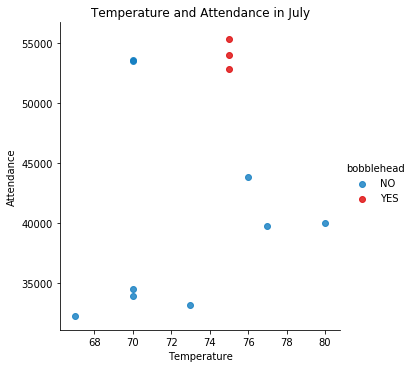

In [19]:
sns.lmplot('temp', 'attend', data=dfJUL, fit_reg=False, hue="bobblehead", hue_order = ['NO', 'YES'])
plt.title('Temperature and Attendance in July')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

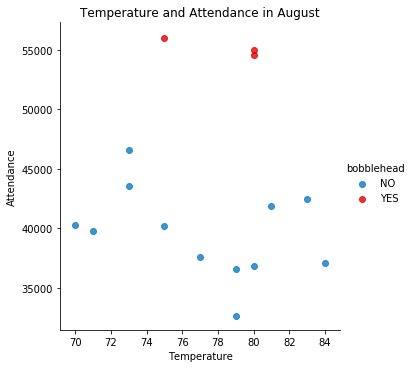

In [20]:
sns.lmplot('temp', 'attend', data=dfAUG, fit_reg=False, hue="bobblehead", hue_order = ['NO', 'YES'])
plt.title('Temperature and Attendance in August')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

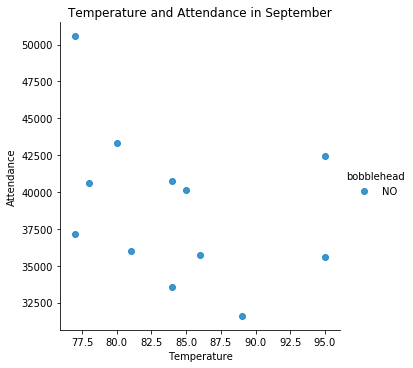

In [21]:
sns.lmplot('temp', 'attend', data=dfSEP, fit_reg=False, hue="bobblehead")
plt.title('Temperature and Attendance in September')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

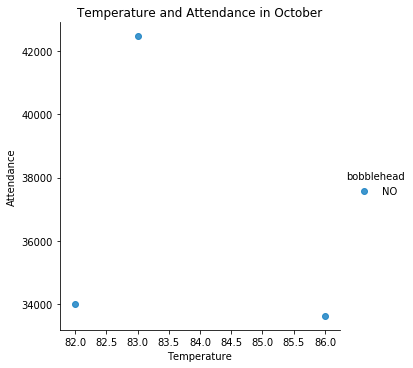

In [22]:
sns.lmplot('temp', 'attend', data=dfOCT, fit_reg=False, hue="bobblehead")
plt.title('Temperature and Attendance in October')
plt.xlabel('Temperature')
plt.ylabel('Attendance');

# Based on this exploratory data analysis, I would run a bobblehead promotion on a Monday in April- preferably against the Atlanta Braves.

### The bobblehead promotion appears to have the greatest impact on attendance, and Mondays in April tend to have the lowest game attendance. Adding a bobblehead promotion for a Monday game in April should have the greatest potential return on investment.